In [1]:
%matplotlib inline
%env JOBLIB_TEMP_FOLDER=/tmp
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import joblib
from sklearn.feature_extraction.text import TfidfVectorizer
import pickle

import nltk
from nltk.corpus import stopwords
from os.path import join
from glob import glob

from time import time
from scipy.sparse import csr_matrix, lil_matrix
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN, AffinityPropagation, SpectralClustering, KMeans

env: JOBLIB_TEMP_FOLDER=/tmp


In [16]:
with open('./texts_test', 'rb') as f:
    texts_test = pickle.load(f)

count_vect = joblib.load('./models/countVect_v3.pkl')
dataset = count_vect.transform(texts_test)

lda = joblib.load('./models/lda_v3.pkl')

In [17]:
term_doc_matrix = count_vect.transform(texts_test)
embeddings = lda.transform(term_doc_matrix)

In [23]:
kmeans = KMeans(n_clusters=60)
clust_labels = kmeans.fit_predict(embeddings)
clust_centers = kmeans.cluster_centers_

In [24]:
embeddings_to_tsne = np.concatenate((embeddings,clust_centers), axis=0)

tSNE =  TSNE(n_components=2, perplexity=15)
tsne_embeddings = tSNE.fit_transform(embeddings_to_tsne)
tsne_embeddings, centroids_embeddings = np.split(tsne_embeddings, [len(clust_labels)], axis=0)

/usr/local/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [25]:
clust_indices = np.unique(clust_labels)

clusters = {clust_ind : [] for clust_ind in clust_indices}
for emb, label in zip(tsne_embeddings, clust_labels):
    clusters[label].append(emb)

for key in clusters.keys():
    clusters[key] = np.array(clusters[key])
colors = cm.rainbow(np.linspace(0, 1, len(clust_indices)))

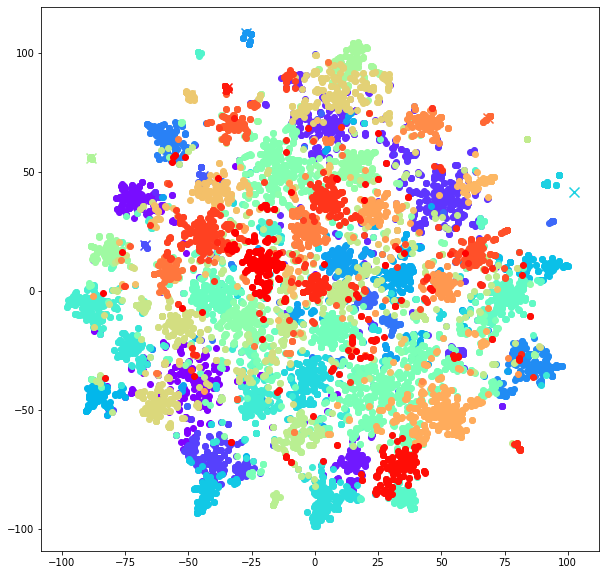

In [26]:
plt.figure(figsize=(10,10))
for ind, color in zip(clust_indices, colors):
    x = clusters[ind][:,0]
    y = clusters[ind][:,1]
    plt.scatter(x, y, color=color)
    
    centroid = centroids_embeddings[ind]
    plt.scatter(centroid[0],centroid[1], color=color, marker='x', s=100)

plt.show()